## Final Project
### Tianyi Tan
### Data Preprocessing, Data Visualization and ML (Label Encoded Data)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn import preprocessing



In [4]:
# load the dataset
survey = pd.read_csv('survey.csv')
survey.shape

(1259, 27)

In [5]:
geo = survey[['Country','state','treatment']]
geo.head()

,Country,state,treatment
0,United States,IL,Yes
1,United States,IN,No
2,Canada,NaN,No
3,United Kingdom,NaN,Yes
4,United States,TX,No


In [6]:
geo_table = pd.crosstab(geo['Country'],geo['treatment'],rownames = ['Country'],colnames = ['treatment'])

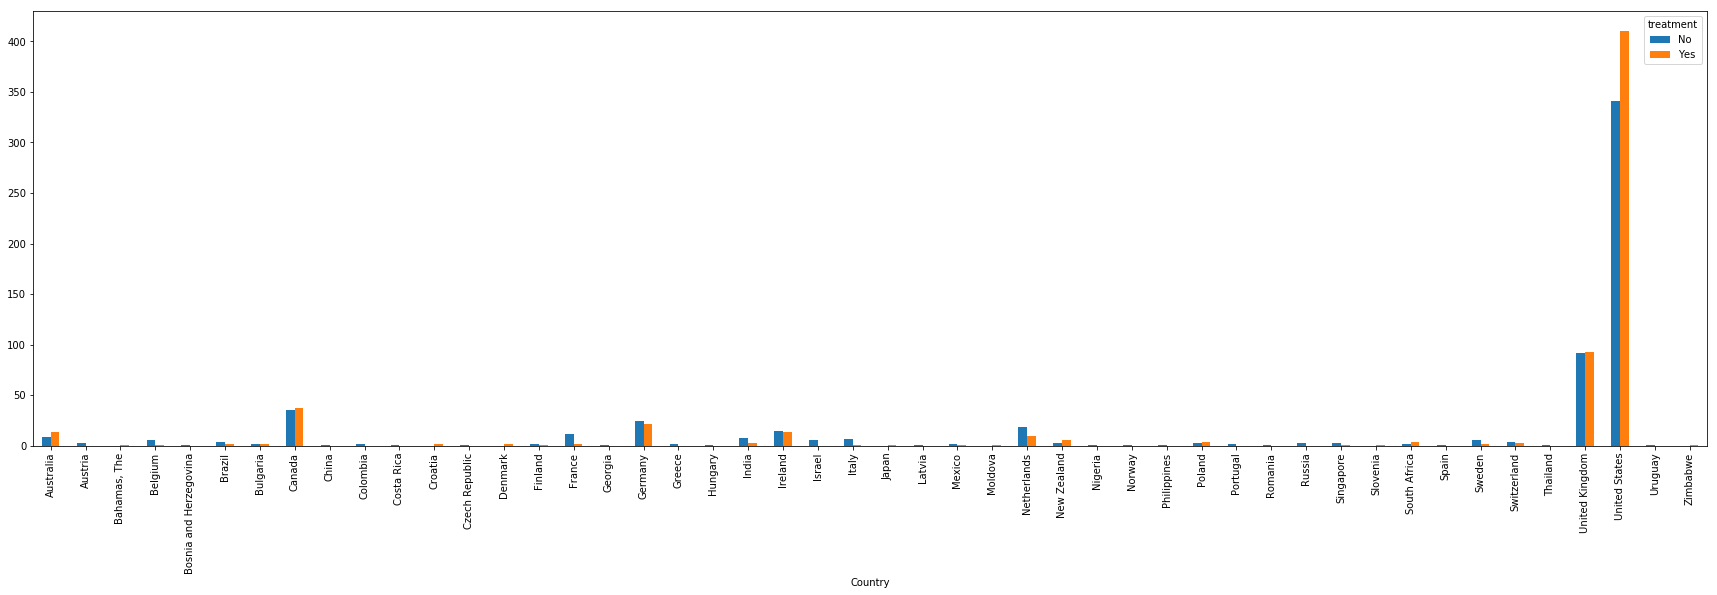

In [7]:
geo_table.plot(kind='bar',figsize=(30,8))

In [8]:
from sklearn.preprocessing import LabelEncoder
lb_geo = LabelEncoder()
geo["treatment_d"] = lb_geo.fit_transform(geo["treatment"])


/Users/lexitan/anaconda/envs/CourseNote/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
#pd.DataFrame(geo['Country'].value_counts()).to_csv('country.csv')

In [137]:
#pd.DataFrame(geo['state'].value_counts()).to_csv('state.csv')

## Dealing with Missing Data

In [10]:
train_df = survey.drop(['comments'],axis = 1)
train_df = train_df.drop(['Timestamp'],axis = 1)
train_df = train_df.drop(['state'], axis= 1)
train_df.shape

(1259, 24)

In [11]:
train_df.isnull().sum()

Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

There are two features containing missing values. 'self_employed'  contains 18 missing records and work_interfere contains 264 missing record. 
Before cleaninhg the data, assign default values for each data type

In [12]:
# the default string is 'NaN'
train_df['self_employed'] = train_df['self_employed'].fillna('NaN')
train_df['work_interfere'] = train_df['work_interfere'].fillna('NaN')




In [13]:
#There are only 0.014% of self employed so lchange NaN to NOT self_employed
#Replace "NaN" string from defaultString
train_df['self_employed'] = train_df['self_employed'].replace(['NaN'], 'No')
print(train_df['self_employed'].unique())

['No' 'Yes']


In [14]:
#There are only 0.20% of self work_interfere so change NaN to "Don't know
#Replace "NaN" string from defaultString

train_df['work_interfere'] = train_df['work_interfere'].replace(['NaN'], 'Don\'t know' )
print(train_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


## Smooth the noisy data

Outliers are observed in five point summary of Age. The minimum and maximum of the age is not possible for a human being. That's why we just smooth the data with the median.
Also, for a person to be legal

In [15]:
# five-point summary of Age
pd.set_option('float_format', '{:f}'.format)
train_df.describe()

,Age
count,1259.000000
mean,79428148.311358
std,2818299442.981968
min,-1726.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,99999999999.000000


In [16]:
train_df['Age'][train_df['Age'] < 18]

143      -29
715    -1726
734        5
989        8
1090      11
1127      -1
Name: Age, dtype: int64

In [17]:
train_df['Age'][train_df['Age'] > 120]

364            329
390    99999999999
Name: Age, dtype: int64

The outliers of age are either below the legal age to work full time or above the normal range of human life expectancy. Thus, it might be reasonable to smooth those data and replace them with the median.

In [19]:
# Fill with median values < 18 and > 120

s = pd.Series(train_df['Age'])
s[s<18] = train_df['Age'].median()
train_df['Age'] = s
s = pd.Series(train_df['Age'])
s[s>120] = train_df['Age'].median()
train_df['Age'] = s

In [20]:
train_df['Age'].describe()

count   1259.000000
mean      32.069897
std        7.265565
min       18.000000
25%       27.000000
50%       31.000000
75%       36.000000
max       72.000000
Name: Age, dtype: float64

Text(0.5, 0, 'Age')

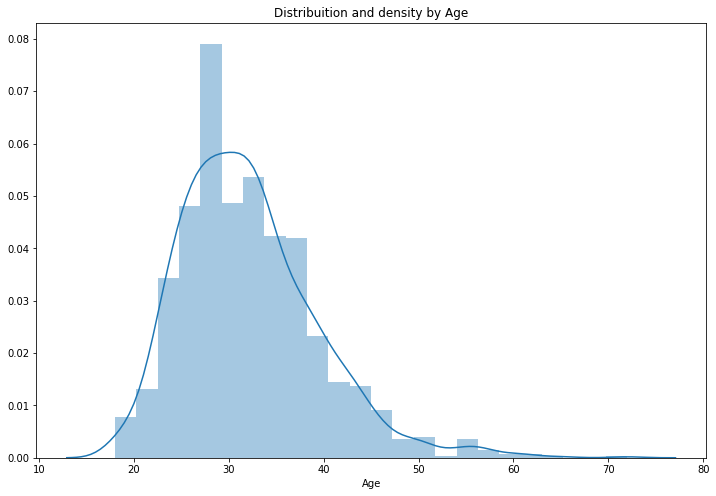

In [21]:
# Distribiution and density by Age
plt.figure(figsize=(12,8))
sns.distplot(train_df["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")

In [22]:
df = train_df.copy()

df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [23]:
df['age_range'].value_counts()

31-65     679
21-30     557
0-20       22
66-100      1
Name: age_range, dtype: int64

In [24]:
df['Age'][train_df['Age'] > 66]

1182    72
Name: Age, dtype: int64

## Data Cleaning: Gender

In [25]:
#clean 'Gender'
#lower case all columm's elements
df['Gender'] = df['Gender'].str.lower()
print(df['Gender'].head())

0    female
1         m
2      male
3      male
4      male
Name: Gender, dtype: object


Three gender category is created:

Male: someone who identifies as a man and was assigned male at birth

Female: someone who identifies as a woman and was assigned female at birth

Trans: Transgender people have a gender identity or gender expression that differs from their assigned sex.

In [26]:
# Select unique elements
gender = df['Gender'].unique()
gender

array(['female', 'm', 'male', 'male-ish', 'maile', 'trans-female',
       'cis female', 'f', 'something kinda male?', 'cis male', 'woman',
       'mal', 'male (cis)', 'queer/she/they', 'non-binary', 'femake',
       'make', 'nah', 'all', 'enby', 'fluid', 'genderqueer', 'female ',
       'androgyne', 'agender', 'cis-female/femme', 'guy (-ish) ^_^',
       'male leaning androgynous', 'male ', 'man', 'trans woman', 'msle',
       'neuter', 'female (trans)', 'queer', 'female (cis)', 'mail',
       'a little about you', 'malr', 'p', 'femail', 'cis man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [27]:
#Made gender groups
male_str = ["male", "m", "male-ish", "maile", 
            "mal", "male (cis)", "make", "male ", 
            "man","msle", "mail", "malr","cis man", 
            "Cis Male", "cis male"]


In [28]:
female_str = ["cis female", "f", "female", "woman",  
              "femake", "female ",
              "cis-female/femme", 
              "female (cis)", "femail"]


In [29]:
trans_str = ["trans-female", "something kinda male?", "queer/she/they", 
             "non-binary","nah", "all", "enby", "fluid", 
             "genderqueer", "androgyne", "agender", 
             "male leaning androgynous", "guy (-ish) ^_^", 
             "trans woman", "neuter", "female (trans)", "queer", 
             "ostensibly male, unsure what that really means"] 


In [30]:
not_sure = ['a little about you', 'p']

In [31]:
for row,col in df.iterrows(): # for each row and columns
    if col.Gender in male_str:
        df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)
    if col.Gender in female_str:
        df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)
    if col.Gender in trans_str:
        df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

        
        

In [32]:
df['Gender'].unique()

array(['female', 'male', 'trans', 'a little about you', 'p'], dtype=object)

In [33]:
df[df['Gender']=='a little about you']


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
989,31,a little about you,"Bahamas, The",Yes,Yes,Yes,Often,1-5,Yes,Yes,...,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,31-65


In [30]:
df[df['Gender']=='p']

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
1127,31,p,United States,Yes,Yes,Yes,Often,1-5,Yes,Yes,...,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,31-65


In [34]:
df = df[~df['Gender'].isin(not_sure)]

In [35]:
df['Gender'].unique()

array(['female', 'male', 'trans'], dtype=object)

In [36]:
encoding = df.copy()

In [37]:
encoding.describe()

,Age
count,1257.000000
mean,32.071599
std,7.271222
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,72.000000


## Data Exploration

In [38]:
labelDict = {}
for feature in encoding:
    le = preprocessing.LabelEncoder()
    le.fit(encoding[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    encoding[feature] = le.transform(encoding[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

#Get rid of 'Country'
encoded = encoding.drop(['Country'], axis= 1)
encoded = encoded.drop(['Age'], axis= 1)
encoded.head()



label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_emp

,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0,0,0,1,2,4,0,1,2,1,...,2,1,1,1,2,1,0,2,0,2
1,1,0,0,0,3,5,0,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,1,0,0,0,3,4,0,1,1,0,...,1,1,1,2,2,2,2,1,0,2
3,1,0,1,1,2,2,0,1,1,2,...,1,2,2,1,0,0,0,1,1,2
4,1,0,0,0,1,1,1,1,2,0,...,0,1,1,1,2,2,2,0,0,2


In [39]:
encoded.isnull().sum()

Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
age_range                    0
dtype: int64

In [40]:
encoded.describe()

,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,...,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000
mean,0.818616,0.114558,0.389817,0.505171,2.287987,2.787589,0.297534,0.818616,1.053302,0.953063,...,1.406523,0.851233,0.829753,0.970565,1.096261,0.868735,0.715990,0.813047,0.144789,1.522673
std,0.422915,0.318615,0.487903,0.500172,1.595612,1.738082,0.457355,0.385490,0.836769,0.865212,...,1.506162,0.767150,0.485102,0.619425,0.844310,0.425446,0.722483,0.833736,0.352028,0.535078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,0.000000,1.000000,3.000000,3.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,4.000000,4.000000,1.000000,1.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000,2.000000
max,2.000000,1.000000,1.000000,1.000000,4.000000,5.000000,1.000000,1.000000,2.000000,2.000000,...,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000


## Data Exploration

## Correlation between all the features
most of the features have weak to moderate correlations. 

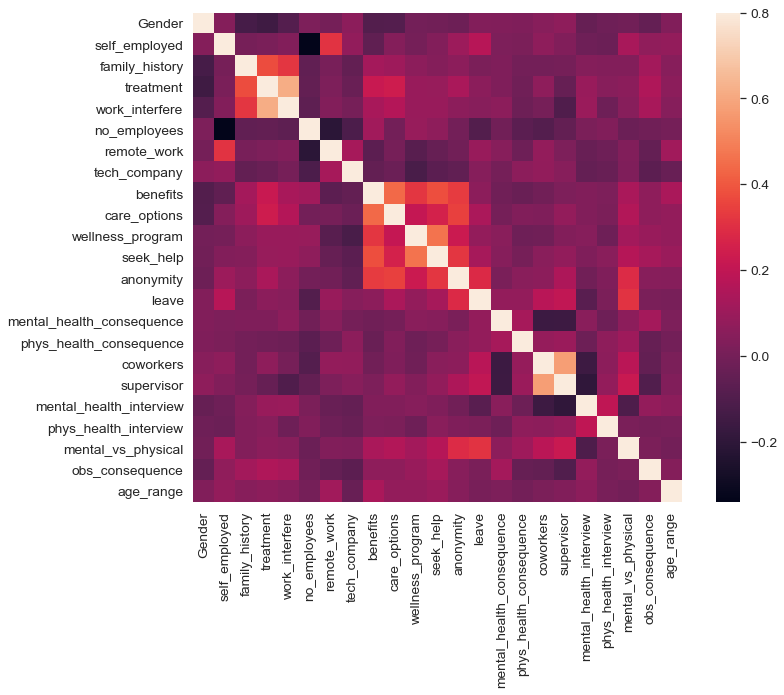

In [80]:
#correlation matrix
corrmat = encoded.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()


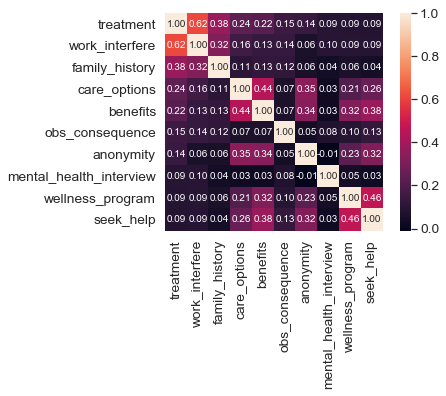

In [82]:
#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(encoded[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Correlation between Treatment and features with high

treatment has high correlation with work_interfere. 
Treatment: Have you sought treatment for a mental health condition?
work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
People who had experience mental health issue tend to believe that the mental health issue would interfere with their work.


The two features seek_help (‘Does your employer provide resources to learn more about mental health issues and how to seek help?’) and wellness program (‘Has your employer ever discussed mental health as part of an employee wellness program?’) has moderate to high correlation. The correlation seemed to be reflecting the fact that when employer provided resources, they might also take a step further and discuss mental health as a part of an employee wellness program.

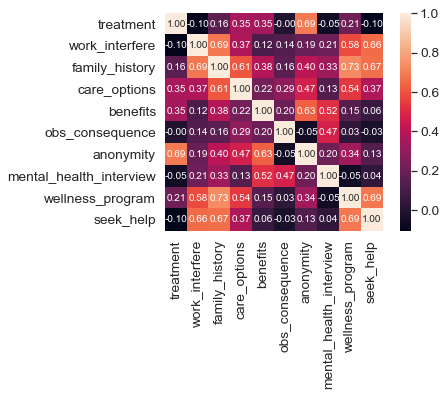

In [79]:
#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = spearmanr(encoded.iloc[cols].values.T)[0]
cm = iloc
#cm = np.corrcoef(encoded[cols].values.T)
#sns.set(font_scale=1.25)
#hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
#plt.show()

Barplot for Treatment:
It shows that in this dataset, the treatment has a approximately equal count of 'Yes' and 'No, which provides a balanced class label.

Text(0.5, 1.0, 'Barplot for Treatment')

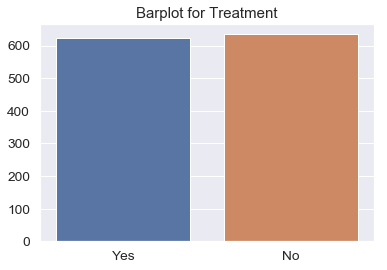

In [40]:
treat_dist = encoded['treatment'].value_counts()
sns.barplot(['Yes','No'],[treat_dist[0],treat_dist[1]]).set_title('Barplot for Treatment')

The distributions of Age for both people having treatment and people without treatment are similar. 

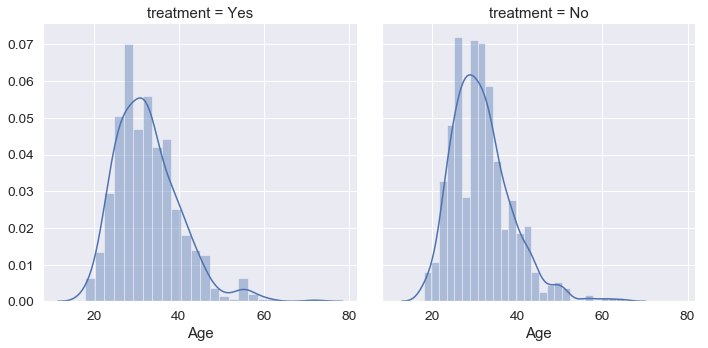

In [328]:
age_treatment = sns.FacetGrid(encoding, col='treatment', height=5)
age_treatment = age_treatment.map(sns.distplot, "Age")

For age range from 66-100. 100% of the people who had sought treatment for a medical condition are female. Men tend to not have sought treatment

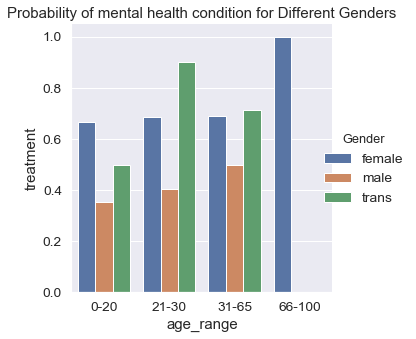

In [35]:
g = sns.catplot(x='age_range', y='treatment', hue='Gender', data=encoded, ci=None,legend_out = True,kind='bar')
g.set_xticklabels(labelDict['label_age_range'])
for t,l in zip(g._legend.texts,labelDict['label_Gender']):
    t.set_text(l)
plt.title('Probability of mental health condition for Different Genders')
g.fig.subplots_adjust(top=0.9,right=0.8)


People with family history of mental issue tends to seek for treatment. People with family histroy of mental issue and also trans gender tends to have higher probability.

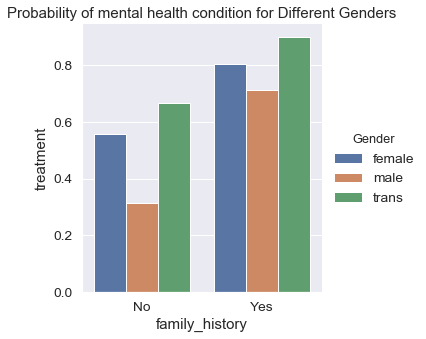

In [36]:
g = sns.catplot(x='family_history', y='treatment', hue='Gender', data=encoded, ci=None,legend_out = True,kind='bar')
g.set_xticklabels(labelDict['label_family_history'])
for t,l in zip(g._legend.texts,labelDict['label_Gender']):
    t.set_text(l)
plt.title('Probability of mental health condition for Different Genders')
g.fig.subplots_adjust(top=0.9,right=0.75)

People who know the options for mental health care provided by the employers tends to seek treatment for mental health issue more.

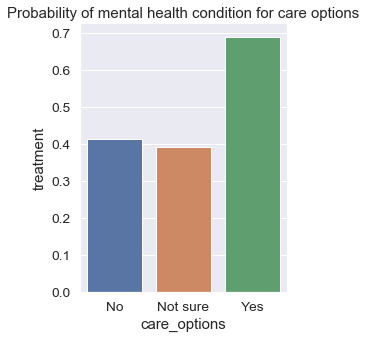

In [37]:
g = sns.catplot(x='care_options', y='treatment', data=encoded, ci=None,legend_out = True,kind='bar')
g.set_xticklabels(labelDict['label_care_options'])

plt.title('Probability of mental health condition for care options')
g.fig.subplots_adjust(top=0.9,right=0.75)

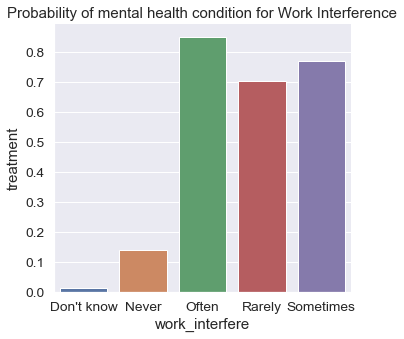

In [38]:
g = sns.catplot(x='work_interfere', y='treatment', data=encoded, ci=None,legend_out = True,kind='bar')
g.set_xticklabels(labelDict['label_work_interfere'])

plt.title('Probability of mental health condition for Work Interference')
g.fig.subplots_adjust(top=0.9,right=1)




## Pattern Discovery

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB,BernoulliNB

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import graphviz


In [84]:
encoded.columns

Index(['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'age_range'],
      dtype='object')

In [85]:
feature_cols = ['Gender', 'self_employed', 'family_history',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'age_range']

In [87]:
X = encoded[feature_cols]
y = encoded.treatment

In [88]:
# # split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


## Tuning 

In [89]:
# create dictionaries for final graph
methodDict= {}

In [90]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
   
    #Null accuracy: accuracy that could be achieved by always 
    # predicting the most frequent class
    print('Null accuracy:\n', y_test.value_counts())
    # calculate the percentage of ones
    print("Actual Class ('Yes') :", y_test.mean())
    # calculate the percentage of zeros
    print("Actual Class ('No') :",1 - y_test.mean())
    
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
          
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    #Classification Accuracy: Overall, how often is the classifier correct?
    print('Classification Accuracy:', accuracy)
    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    false_positive_rate = FP / float(TN + FP)
    #False Positive Rate: When the actual value is negative, 
    #how often is the prediction incorrect?
    print('False Positive Rate:', false_positive_rate)
    #Precision: When a positive value is predicted,
    #how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    
    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    
    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())
    
    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    #ROC Curves and Area Under the Curve (AUC)
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
    return accuracy

In [91]:
def tuningGridSerach(knn,k_range):
    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range)
    print(param_grid)
    
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    # fit the grid with data
    grid.fit(X, y)
    # convert the search results into a pandas df
    results = pd.DataFrame(grid.cv_results_)
    
    grid_mean_scores = results['mean_test_score']
    print('grid_mean_scores:')
    print(grid_mean_scores)
    
    # plot the results
    plt.plot(k_range, grid_mean_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()
    
    # examine the best model
    print('GridSearch best score', grid.best_score_)
    print('GridSearch best params', grid.best_params_)
    print('GridSearch best estimator', grid.best_estimator_)
    
 

 

In [92]:
def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5, iid = True)
    rand.fit(X, y)
    # convert the search results into a pandas df
    results = pd.DataFrame(rand.cv_results_)
    print(results)
    
    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)
    
    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10,iid = True)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

In [93]:
def tuningMultParam(knn):
    
    #Searching multiple parameters simultaneously
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    metric_options = ['jaccard','dice','euclidean','matching']
        
    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range, weights=weight_options,metric=metric_options)
    print(param_grid) 
    
  
    
    # instantiate and fit the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, y) 
    
    # convert the search results into a pandas df
    results = pd.DataFrame(grid.cv_results_)
    # view the complete results
    grid_mean_scores = results['mean_test_score']
    print('grid_mean_scores:')
    print(grid_mean_scores)
    
    
    # examine the best model
    print('Multiparam. Best Score: ', grid.best_score_)
    print('Multiparam. Best Params: ', grid.best_params_)

In [94]:
def logisticRegression():
    # train a logistic regression model on the training set
    logreg =  LogisticRegression(solver='lbfgs',penalty = 'l2',max_iter = 200)
    logreg.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)
    
    print('########### Logistic Regression ###############')
    
    accuracy_score = evalClassModel(logreg, y_test, y_pred_class, True)
    
    r_square = r2_score(y_test, y_pred_class) 
    print('r-square',r_square)
    #Data for final graph
    methodDict['Log. Regres.'] = accuracy_score * 100
    
    
    

########### Logistic Regression ###############
Null accuracy:
 0    129
1    123
Name: treatment, dtype: int64
Actual Class ('Yes') : 0.4880952380952381
Actual Class ('No') : 0.5119047619047619


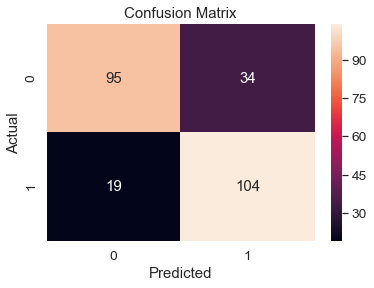

Classification Accuracy: 0.7896825396825397
Classification Error: 0.21031746031746035
False Positive Rate: 0.26356589147286824
Precision: 0.7536231884057971
AUC Score: 0.7909812819058424
Cross-validated AUC: 0.8742007488479263


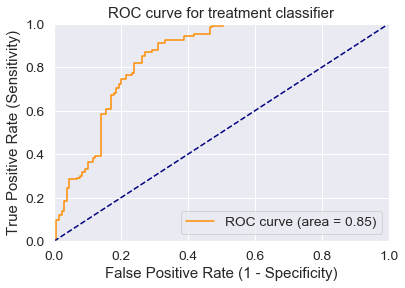

r-square 0.1582529778786158


In [100]:
logisticRegression()

In [98]:
logreg =  LogisticRegression(solver='lbfgs',penalty = 'l2',max_iter = 200)
logreg.fit(X_train, y_train)
std_coef = np.std(np.array(X_train),axis=0)*logreg.coef_
coef_dict = {}
i = 0
for col in X_train.columns:
    coef_dict[col] = std_coef[0][i]
    i+=1
coef_dict


{'Gender': -0.24630362478747114,
 'self_employed': -0.003592039076037049,
 'family_history': 0.5097798724018205,
 'work_interfere': 1.5311224626756221,
 'no_employees': -0.03377552069195328,
 'remote_work': 0.019093234379424125,
 'tech_company': -0.10643760026266338,
 'benefits': 0.32695414187056643,
 'care_options': 0.2883871025531243,
 'wellness_program': 0.004317631773496336,
 'seek_help': -0.2920346033281041,
 'anonymity': 0.2079609362887945,
 'leave': -0.017869869112479484,
 'mental_health_consequence': -0.051444601850176574,
 'phys_health_consequence': 0.022277636014947793,
 'coworkers': 0.3225783684450953,
 'supervisor': -0.1546009094499315,
 'mental_health_interview': 0.09133311342807532,
 'phys_health_interview': 0.17370230932189398,
 'mental_vs_physical': -0.04121168812868528,
 'obs_consequence': 0.25692090861274314,
 'age_range': 0.055163361137259115}

In [99]:
for f in sorted(coef_dict, key=coef_dict.get, reverse=True)[:5]:
  print ('{:10} {:8}'.format(f, coef_dict[f]))



work_interfere 1.5311224626756221
family_history 0.5097798724018205
benefits   0.32695414187056643
coworkers  0.3225783684450953
care_options 0.2883871025531243


### KNeighbors Classifier

In [103]:
def Knn():
    # Calculating the best parameters
    knn = KNeighborsClassifier()
    
    tuningMultParam(knn)
    
    # train a KNeighborsClassifier model on the training set
    knn = KNeighborsClassifier(n_neighbors=28, weights='uniform')
    knn.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = knn.predict(X_test)
    
    print('########### KNeighborsClassifier ###############')
    
    accuracy_score = evalClassModel(knn, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['KNN'] = accuracy_score * 100

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance'], 'metric': ['jaccard', 'dice', 'euclidean', 'matching']}
grid_mean_scores:
0     0.663484
1     0.663484
2     0.642800
3     0.650756
4     0.683373
5     0.680986
6     0.680191
7     0.680191
8     0.698488
9     0.694511
10    0.685760
11    0.696897
12    0.697693
13    0.690533
14    0.698488
15    0.688942
16    0.696897
17    0.693715
18    0.698488
19    0.690533
20    0.688146
21    0.690533
22    0.704853
23    0.696102
24    0.703262
25    0.700875
26    0.705648
27    0.704853
28    0.700080
29    0.699284
        ...   
210   0.716786
211   0.703262
212   0.726333
213   0.708035
214   0.709626
215   0.699284
216   0.710422
217   0.704853
218   0.717582
219   0.716786
220   0.715195
221   0.708035
222   0.723946
223   0.712013
224   0.722355
225   0.709626
226   0.719173
227   0.706444
228   0.722355
229   0.715

/Users/lexitan/anaconda/envs/CourseNote/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


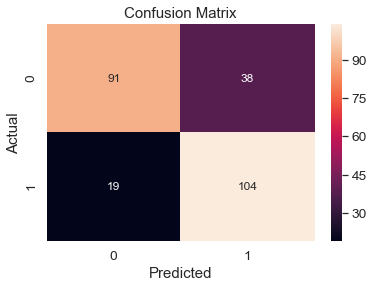

Classification Accuracy: 0.7738095238095238
Classification Error: 0.22619047619047616
False Positive Rate: 0.29457364341085274
Precision: 0.7323943661971831
AUC Score: 0.7754774059368501
Cross-validated AUC: 0.8565882216461853


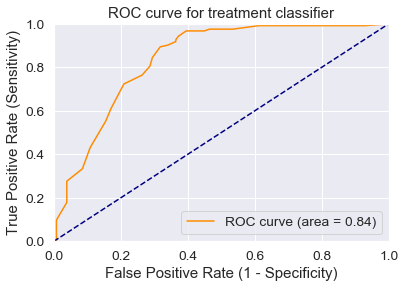

In [104]:
Knn()

In [105]:
def treeClassifier():
    # Calculating the best parameters
    tree = DecisionTreeClassifier()
    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(tree, param_dist)
    
    # train a decision tree model on the training set
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=16, criterion='entropy', min_samples_leaf=6)
    tree.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = tree.predict(X_test)
    
    print('########### Tree classifier ###############')
    
    accuracy_score = evalClassModel(tree, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Tree clas.'] = accuracy_score * 100

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.003983      0.002635         0.001426        0.000474   
1       0.003111      0.000880         0.001344        0.000415   
2       0.002490      0.000635         0.001114        0.000438   
3       0.002278      0.000243         0.000978        0.000308   
4       0.002104      0.000170         0.000852        0.000035   
5       0.003305      0.000144         0.000934        0.000281   
6       0.001906      0.000069         0.000818        0.000010   
7       0.001629      0.000033         0.000804        0.000005   
8       0.001885      0.000054         0.000831        0.000012   
9       0.001898      0.000085         0.000811        0.000007   

  param_criterion param_max_depth param_max_features param_min_samples_leaf  \
0         entropy               3                 16                      6   
1            gini               3                 10                      1   
2         entropy        

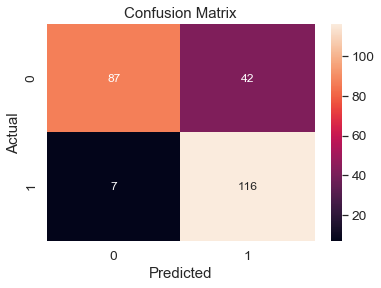

Classification Accuracy: 0.8055555555555556
Classification Error: 0.19444444444444442
False Positive Rate: 0.32558139534883723
Precision: 0.7341772151898734
AUC Score: 0.8087540177727359
Cross-validated AUC: 0.8843896009344598


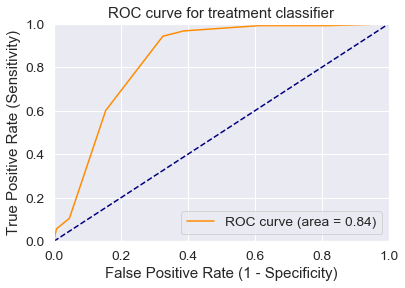

In [106]:
treeClassifier()

In [107]:
tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=16, criterion='entropy', min_samples_leaf=6)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=16, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [108]:
feature_importance = dict(zip(X_train.columns,tree.feature_importances_))


In [109]:
for f in sorted(feature_importance, key=feature_importance.get, reverse=True)[:5]:
  print ('{:10} {:8}'.format(f, feature_importance[f]))



work_interfere 0.8937152435371268
family_history 0.049795413551348144
Gender     0.03127708602361877
anonymity  0.016973091810917912
no_employees 0.008239165076988362


In [110]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file='tree.dot', feature_names=X_train.columns)


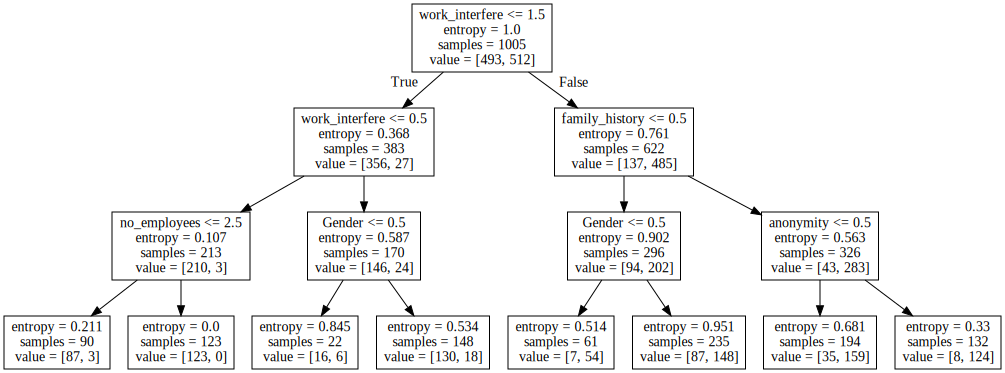

In [111]:
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [112]:
def NB():
    gnb = GaussianNB()
    
    # train a GaussianNB classifier model on the training set

    gnb.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = gnb.predict(X_test)
    
    print('########### GaussianNBClassifier ###############')
    
    accuracy_score = evalClassModel(gnb, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['NB'] = accuracy_score * 100

########### GaussianNBClassifier ###############
Null accuracy:
 0    129
1    123
Name: treatment, dtype: int64
Actual Class ('Yes') : 0.4880952380952381
Actual Class ('No') : 0.5119047619047619


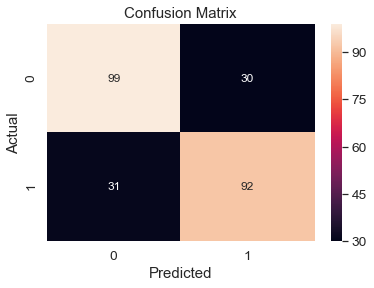

Classification Accuracy: 0.7579365079365079
Classification Error: 0.2420634920634921
False Positive Rate: 0.23255813953488372
Precision: 0.7540983606557377
AUC Score: 0.7577046700699566
Cross-validated AUC: 0.8700220814132106


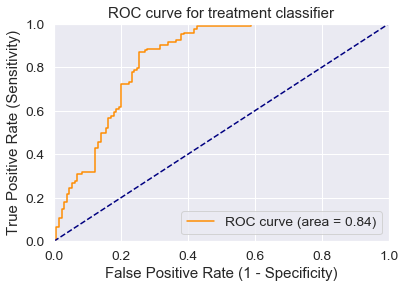

In [113]:
NB()

In [114]:
def BNB():
    bnb = BernoulliNB()
    
    # train a BernoulliNB classifier model on the training set

    bnb.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = bnb.predict(X_test)
    
    print('########### BernoulliNBClassifier ###############')
    
    accuracy_score = evalClassModel(bnb, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['BNB'] = accuracy_score * 100


########### BernoulliNBClassifier ###############
Null accuracy:
 0    129
1    123
Name: treatment, dtype: int64
Actual Class ('Yes') : 0.4880952380952381
Actual Class ('No') : 0.5119047619047619


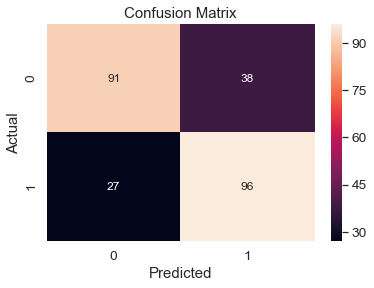

Classification Accuracy: 0.7420634920634921
Classification Error: 0.2579365079365079
False Positive Rate: 0.29457364341085274
Precision: 0.7164179104477612
AUC Score: 0.742957080733598
Cross-validated AUC: 0.8362217181899642


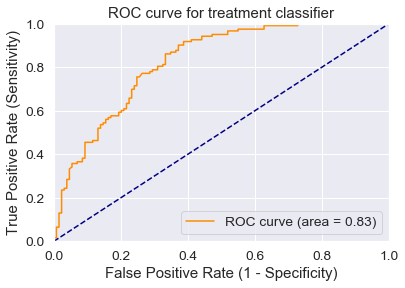

In [115]:
BNB()

In [116]:
def plotSuccess():
    s = pd.Series(methodDict)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar') 
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([70.0, 90.0])
    plt.xlabel('Method')
    plt.ylabel('Accuracy')
    plt.title('Success of methods')
     
    plt.show()

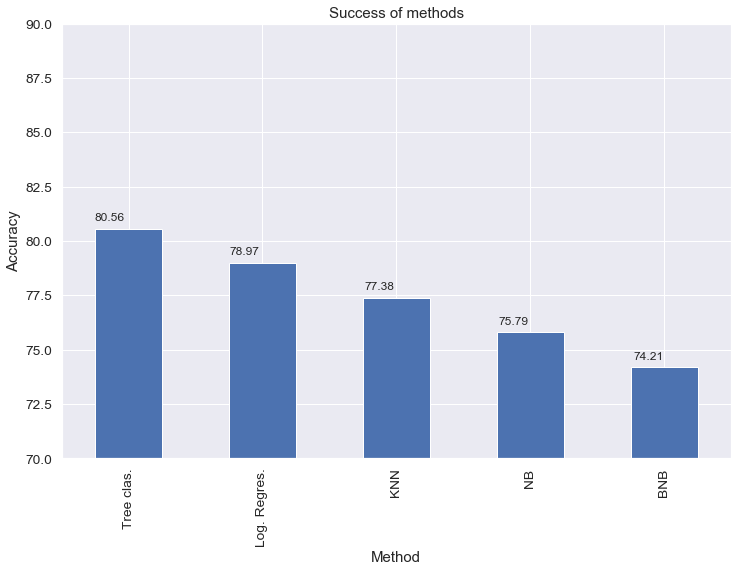

In [119]:
plotSuccess()

 ## Try for Kmode
 It is not included in the data analysis due to the poor performance

In [118]:
import numpy as np
from kmodes.kmodes import KModes

# random categorical data
data = np.array(X_train)

km = KModes(n_clusters=2, init='Huang', n_init=10, verbose=1)

clusters = km.fit_predict(data)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 317, cost: 8680.0
Run 1, iteration: 2/100, moves: 0, cost: 8680.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 224, cost: 8451.0
Run 2, iteration: 2/100, moves: 83, cost: 8451.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 207, cost: 8465.0
Run 3, iteration: 2/100, moves: 64, cost: 8426.0
Run 3, iteration: 3/100, moves: 15, cost: 8426.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 289, cost: 8528.0
Run 4, iteration: 2/100, moves: 61, cost: 8528.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 284, cost: 8466.0
Run 5, iteration: 2/100, moves: 121, cost: 8466.0
Init: initializing centroids
Init: initializing clusters

In [120]:
predicted_label = km.labels_

In [121]:
c_0 = []
c_1 = []
for index in range(len(predicted_label)):
    if predicted_label[index] ==0:
        c_0.append(index)
    if predicted_label[index] ==1:
        c_1.append(index)
    

In [122]:
cluster0 = X_train.iloc[c_0,:]


In [123]:
c0_class = y_train.iloc[c_0]

In [124]:
cluster1 = X_train.iloc[c_1,:]

In [125]:
c1_class = y_train.iloc[c_1]

In [126]:
c1_class.value_counts()

0    247
1    178
Name: treatment, dtype: int64